In [218]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from albumentations import (
    HorizontalFlip, VerticalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, ElasticTransform,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, GaussianBlur, MotionBlur, MedianBlur, IAAPiecewiseAffine, RandomResizedCrop,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose, Normalize, Cutout, CoarseDropout, ShiftScaleRotate, CenterCrop, Resize, GridDropout
)
from albumentations.pytorch import ToTensorV2

cfg = {
    'img_size': 384,
}

def get_train_transforms():
    return Compose([
            Resize(cfg['img_size'], cfg['img_size']),
            # RandomResizedCrop(cfg['img_size'], cfg['img_size'], scale=(0.2, 1)),
            # Transpose(p=0.5), # 就是矩阵转置
#             HorizontalFlip(p=0.5),
#             VerticalFlip(p=0.5),
#             CLAHE(clip_limit=4.0, p=1),
#             ShiftScaleRotate(p=0.5),
#             OneOf([
#                 OpticalDistortion(distort_limit=0.8),
#                 GridDistortion(num_steps=5, distort_limit=0.8),
#                 ElasticTransform(alpha=3),
#             ], p=0.9),
#             OneOf([
#                 MotionBlur(blur_limit=5),
#                 MedianBlur(blur_limit=5),
#                 GaussianBlur(blur_limit=5),
#                 GaussNoise(var_limit=(5.0, 30.0)),
#             ], p=0.9),
            # CoarseDropout(max_holes=40, max_height=16, max_width=16, p=1),
            GridDropout(
                unit_size_min = 3,
                unit_size_max = 10,
                holes_number_x = 2,
                holes_number_y = 2,
                shift_x = 2,
                shift_y = 2,
                random_offset = True,
                p=0.2
            ),
        ], p=1.0)

def get_img(img_path):
    img_bgr = cv2.imread(img_path)
    return img_bgr[..., ::-1]

data_path = os.path.abspath(os.path.join(os.path.curdir, 'input/cassava-leaf-disease-classification'))
train_path = os.path.join(data_path, 'train_images')
label_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test_images')
csv_path = os.path.join(data_path, 'sample_submission.csv')
cwd = os.path.abspath('.')
label_df = pd.read_csv(label_path)

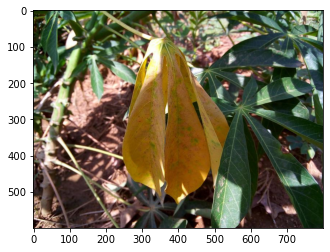

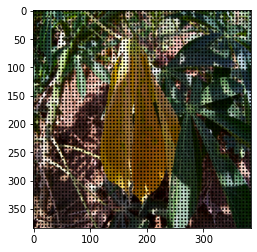

In [225]:
iid = label_df['image_id'].values[130]
img = get_img(os.path.join(train_path, iid))
plt.figure(1)
plt.imshow(img)
ti = get_train_transforms()(image=img)['image']
plt.figure(2)
plt.imshow(ti)